In [25]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from src.strategy import SMACrossoverStrategy, RSIStrategy, BollingerStrategy, CompositeStrategy
from src.data_utils import preprocess_data, calculate_features, plot_data



In [26]:
data  = pd.read_csv('./data/BSE_Sensex_30_Historical_Data_2021_2024.csv')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      991 non-null    object
 1   Price     991 non-null    object
 2   Open      991 non-null    object
 3   High      991 non-null    object
 4   Low       991 non-null    object
 5   Vol.      991 non-null    object
 6   Change %  991 non-null    object
dtypes: object(7)
memory usage: 54.3+ KB


In [28]:
df = preprocess_data(data)

/Users/mohdtahaabbas/StratArm/src/data_utils.py:11: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [29]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-01-01,47868.98,47785.28,47980.36,47771.15,8270000.0,0.0025
1,2021-01-04,48176.80,48109.17,48220.47,47594.47,13870000.0,0.0064
2,2021-01-05,48437.78,48037.63,48486.24,47903.38,12180000.0,0.0054
3,2021-01-06,48174.06,48616.66,48616.66,47864.14,22500000.0,-0.0054
4,2021-01-07,48093.32,48524.36,48558.34,48037.87,18430000.0,-0.0017


Data types after conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      991 non-null    datetime64[ns]
 1   Price     991 non-null    float64       
 2   Open      991 non-null    float64       
 3   High      991 non-null    float64       
 4   Low       991 non-null    float64       
 5   Vol.      991 non-null    float64       
 6   Change %  991 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 54.3 KB
None

NaN values per column after conversion:
Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

Plotting 'Price' vs Date...


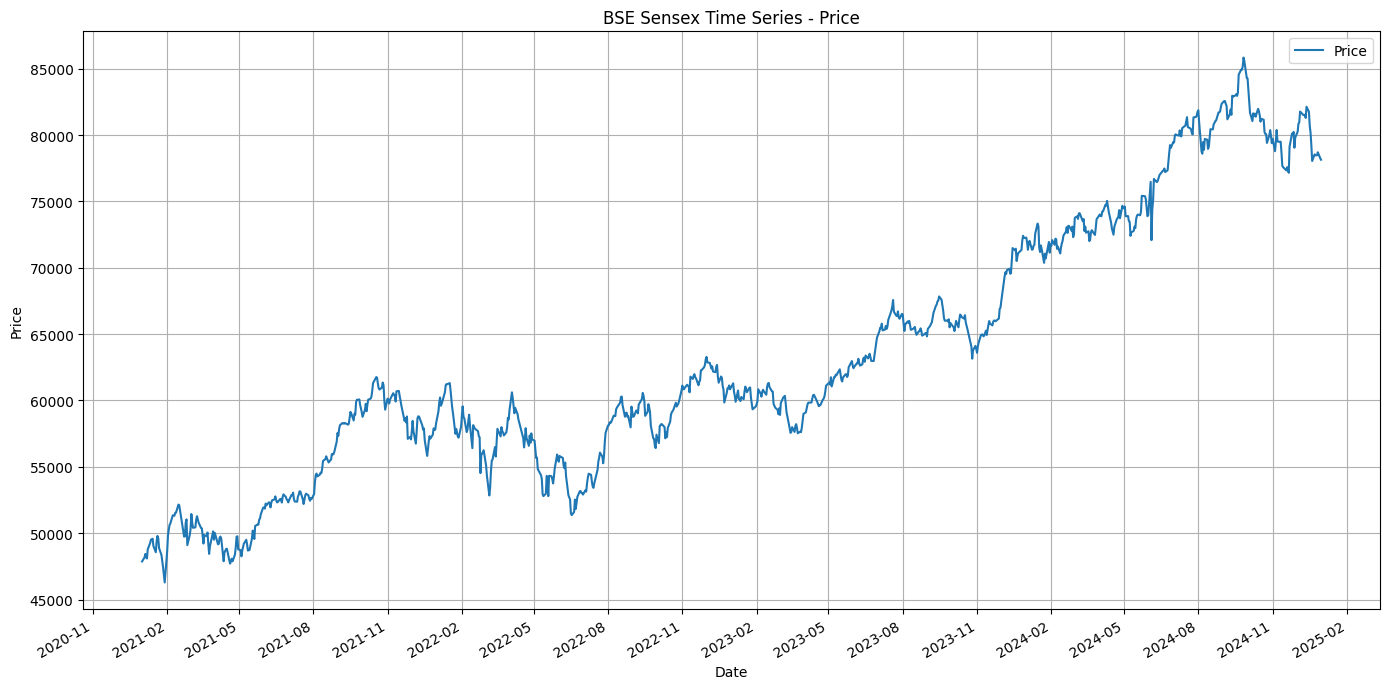

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2021-01-01,47868.98,47785.28,47980.36,47771.15,8270000.0,0.0025
2021-01-04,48176.80,48109.17,48220.47,47594.47,13870000.0,0.0064
2021-01-05,48437.78,48037.63,48486.24,47903.38,12180000.0,0.0054
2021-01-06,48174.06,48616.66,48616.66,47864.14,22500000.0,-0.0054
2021-01-07,48093.32,48524.36,48558.34,48037.87,18430000.0,-0.0017
...,...,...,...,...,...,...
2024-12-24,78472.87,78707.37,78877.36,78397.79,6180000.0,-0.0009
2024-12-26,78472.48,78557.28,78898.37,78173.38,5570000.0,0.0000
2024-12-27,78699.07,78607.62,79043.15,78598.55,7690000.0,0.0029


In [30]:
plot_data(df)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      991 non-null    datetime64[ns]
 1   Price     991 non-null    float64       
 2   Open      991 non-null    float64       
 3   High      991 non-null    float64       
 4   Low       991 non-null    float64       
 5   Vol.      991 non-null    float64       
 6   Change %  991 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 54.3 KB


In [32]:
feature = calculate_features(df)

Dropped 49 rows with NaNs after feature calculation.


/Users/mohdtahaabbas/StratArm/src/data_utils.py:107: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_feat['RSI'].replace([np.inf, -np.inf], 100, inplace=True) # If avg_loss is 0, RSI is 100
/Users/mohdtahaabbas/StratArm/src/data_utils.py:108: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [33]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
Index: 942 entries, 49 to 990
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      942 non-null    datetime64[ns]
 1   Price     942 non-null    float64       
 2   Open      942 non-null    float64       
 3   High      942 non-null    float64       
 4   Low       942 non-null    float64       
 5   Vol.      942 non-null    float64       
 6   Change %  942 non-null    float64       
 7   SMA_20    942 non-null    float64       
 8   SMA_50    942 non-null    float64       
 9   RSI       942 non-null    float64       
 10  BB_MA20   942 non-null    float64       
 11  BB_STD20  942 non-null    float64       
 12  BB_UPPER  942 non-null    float64       
 13  BB_LOWER  942 non-null    float64       
dtypes: datetime64[ns](1), float64(13)
memory usage: 110.4 KB


In [34]:
from src.bandit_algorithms import Eps_Greedy, GaussianThompsonSampling, UCB, KL_UCB, EWMA_UCB, SW_UCB
from src.simulator import Simulator

In [35]:
strategies = [
        SMACrossoverStrategy(),
        RSIStrategy(),
        BollingerStrategy(),
    
        CompositeStrategy([
                SMACrossoverStrategy(),
                RSIStrategy(),
                BollingerStrategy(),
        ])
]
# swap MAB algorithms as needed:
# mab = Eps_Greedy(len(strategies), horizon=len(df))
# mab = UCB(len(strategies), horizon=len(df))
# mab = GaussianThompsonSampling(len(strategies), horizon=len(df))
# mab = Thompson_Sampling(len(strategies), horizon=len(df))
#mab = EWMA_UCB(len(strategies), horizon=len(df))
# mab = SW_UCB(len(strategies), horizon=len(df))    
# mab = SW_UCB(len(composite), horizon=len(df))  
estimated_min_reward = -0.05  # Example: -5% estimated minimum single-step return
estimated_max_reward = 0.05   # Example: +5% estimated maximum single-step return

mab = UCB(num_arms=len(strategies),
                  c=2.0, # Keep other params like c
                  min_reward=estimated_min_reward, # <-- ADD THIS
                  max_reward=estimated_max_reward)   

sim = Simulator(feature, strategies, mab)
# sim= Simulator(feature, composite, mab)
results = sim.run()


Starting simulation...
Pre-calculating strategy signals...
  Generating signals for strategy 0: EMA Crossover with Trend Filter...
  Generating signals for strategy 1: Smoothed RSI with Crossover...
  Generating signals for strategy 2: Bollinger Band Crossover...
  Generating signals for strategy 3: Composite Majority Vote...
Running simulation loop...
  Step 100/942 completed. Current Cumulative Return: 0.0119
  Step 200/942 completed. Current Cumulative Return: 0.0821
  Step 300/942 completed. Current Cumulative Return: 0.0896
  Step 400/942 completed. Current Cumulative Return: 0.1119
  Step 500/942 completed. Current Cumulative Return: 0.1566
  Step 600/942 completed. Current Cumulative Return: 0.1673
  Step 700/942 completed. Current Cumulative Return: 0.2015
  Step 800/942 completed. Current Cumulative Return: 0.2918
  Step 900/942 completed. Current Cumulative Return: 0.4212
  Step 942/942 completed. Current Cumulative Return: 0.3771
Simulation finished.


Plotting results...
Could not plot Buy & Hold benchmark: name 'price_returns' is not defined


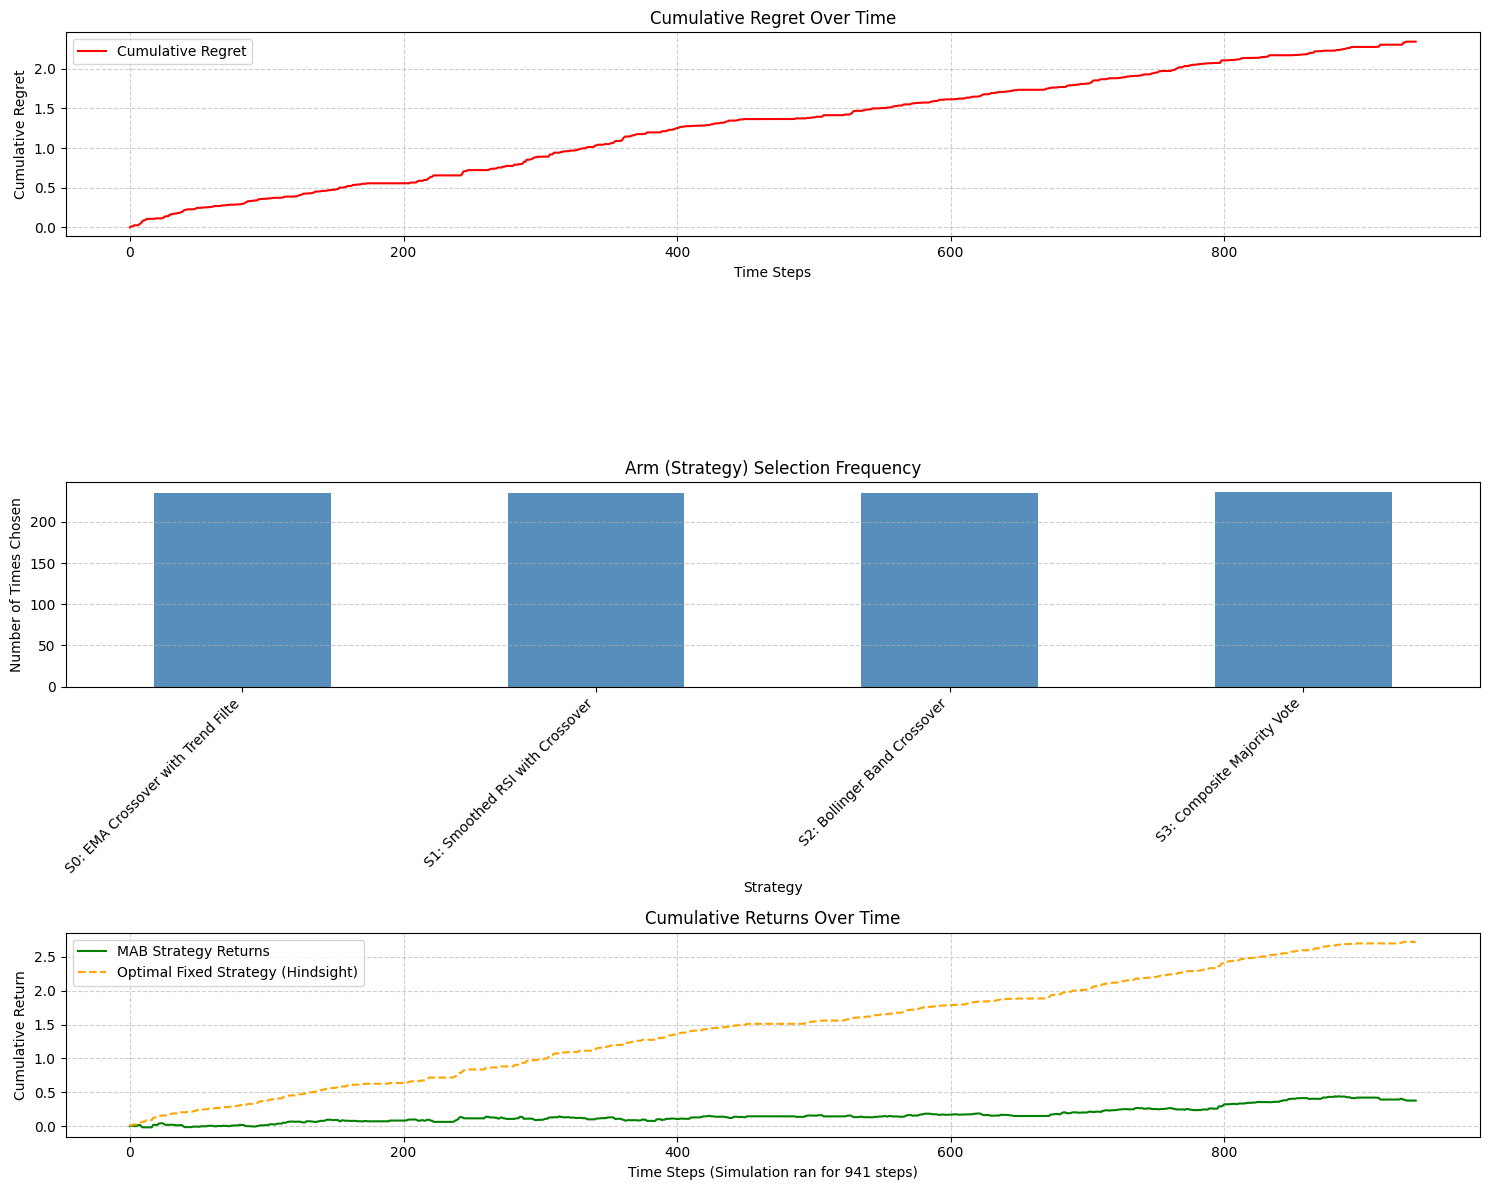

Plotting finished.


In [36]:
sim.plot_results()